<a href="https://colab.research.google.com/github/albrin007/machine_learning/blob/main/Albrin_TB_Diabetes_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES PREDICTION**

Name: Albrin T B

Organization: Entri Elevate

Date: [18/01/2004]

1. **Overview of Problem Statement:**

Diabetes is a chronic health condition that affects millions of people worldwide. It occurs when the body either does not produce enough insulin or is unable to effectively use the insulin it produces, leading to elevated blood sugar levels. Early detection of diabetes is crucial as it helps in preventing or delaying complications such as heart disease, kidney failure, and nerve damage. However, diagnosing diabetes in its early stages can be challenging due to the subtle symptoms and the variability in individual health indicators.

The goal of this project is to predict whether a person has diabetes or not based on several health-related features, such as blood pressure, BMI, age, and glucose levels. By creating an effective prediction model, healthcare professionals can identify individuals at risk of diabetes early, enabling timely intervention and lifestyle modifications. This model could ultimately assist in the management and prevention of diabetes, improving overall public health outcomes.



2. **Objective:**

Develop a predictive model to classify individuals as having diabetes based on health-related features from the "Diabetes_dataset.csv." Perform data cleaning, exploratory data analysis, feature engineering, and selection, then build and evaluate multiple classification models to determine the most accurate predictor of diabetes.

 3. **Data Description:**
   - Source: [UCI Machine Learning Repository]
   - Features: [Age,Diabetes Pedigree Function,GenderInsulin Levels,Insulin Levels,Blood Pressure,Body Mass Index]


4. **Data Collection:**

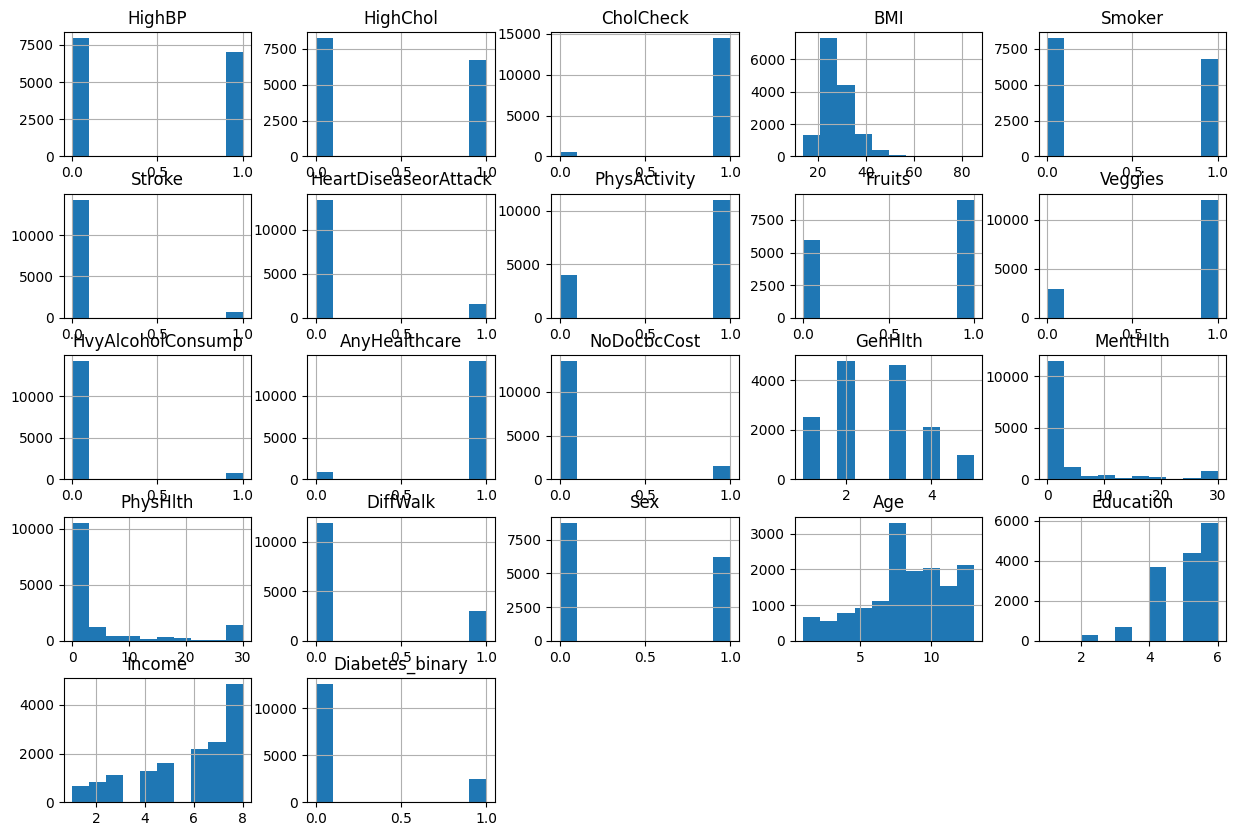

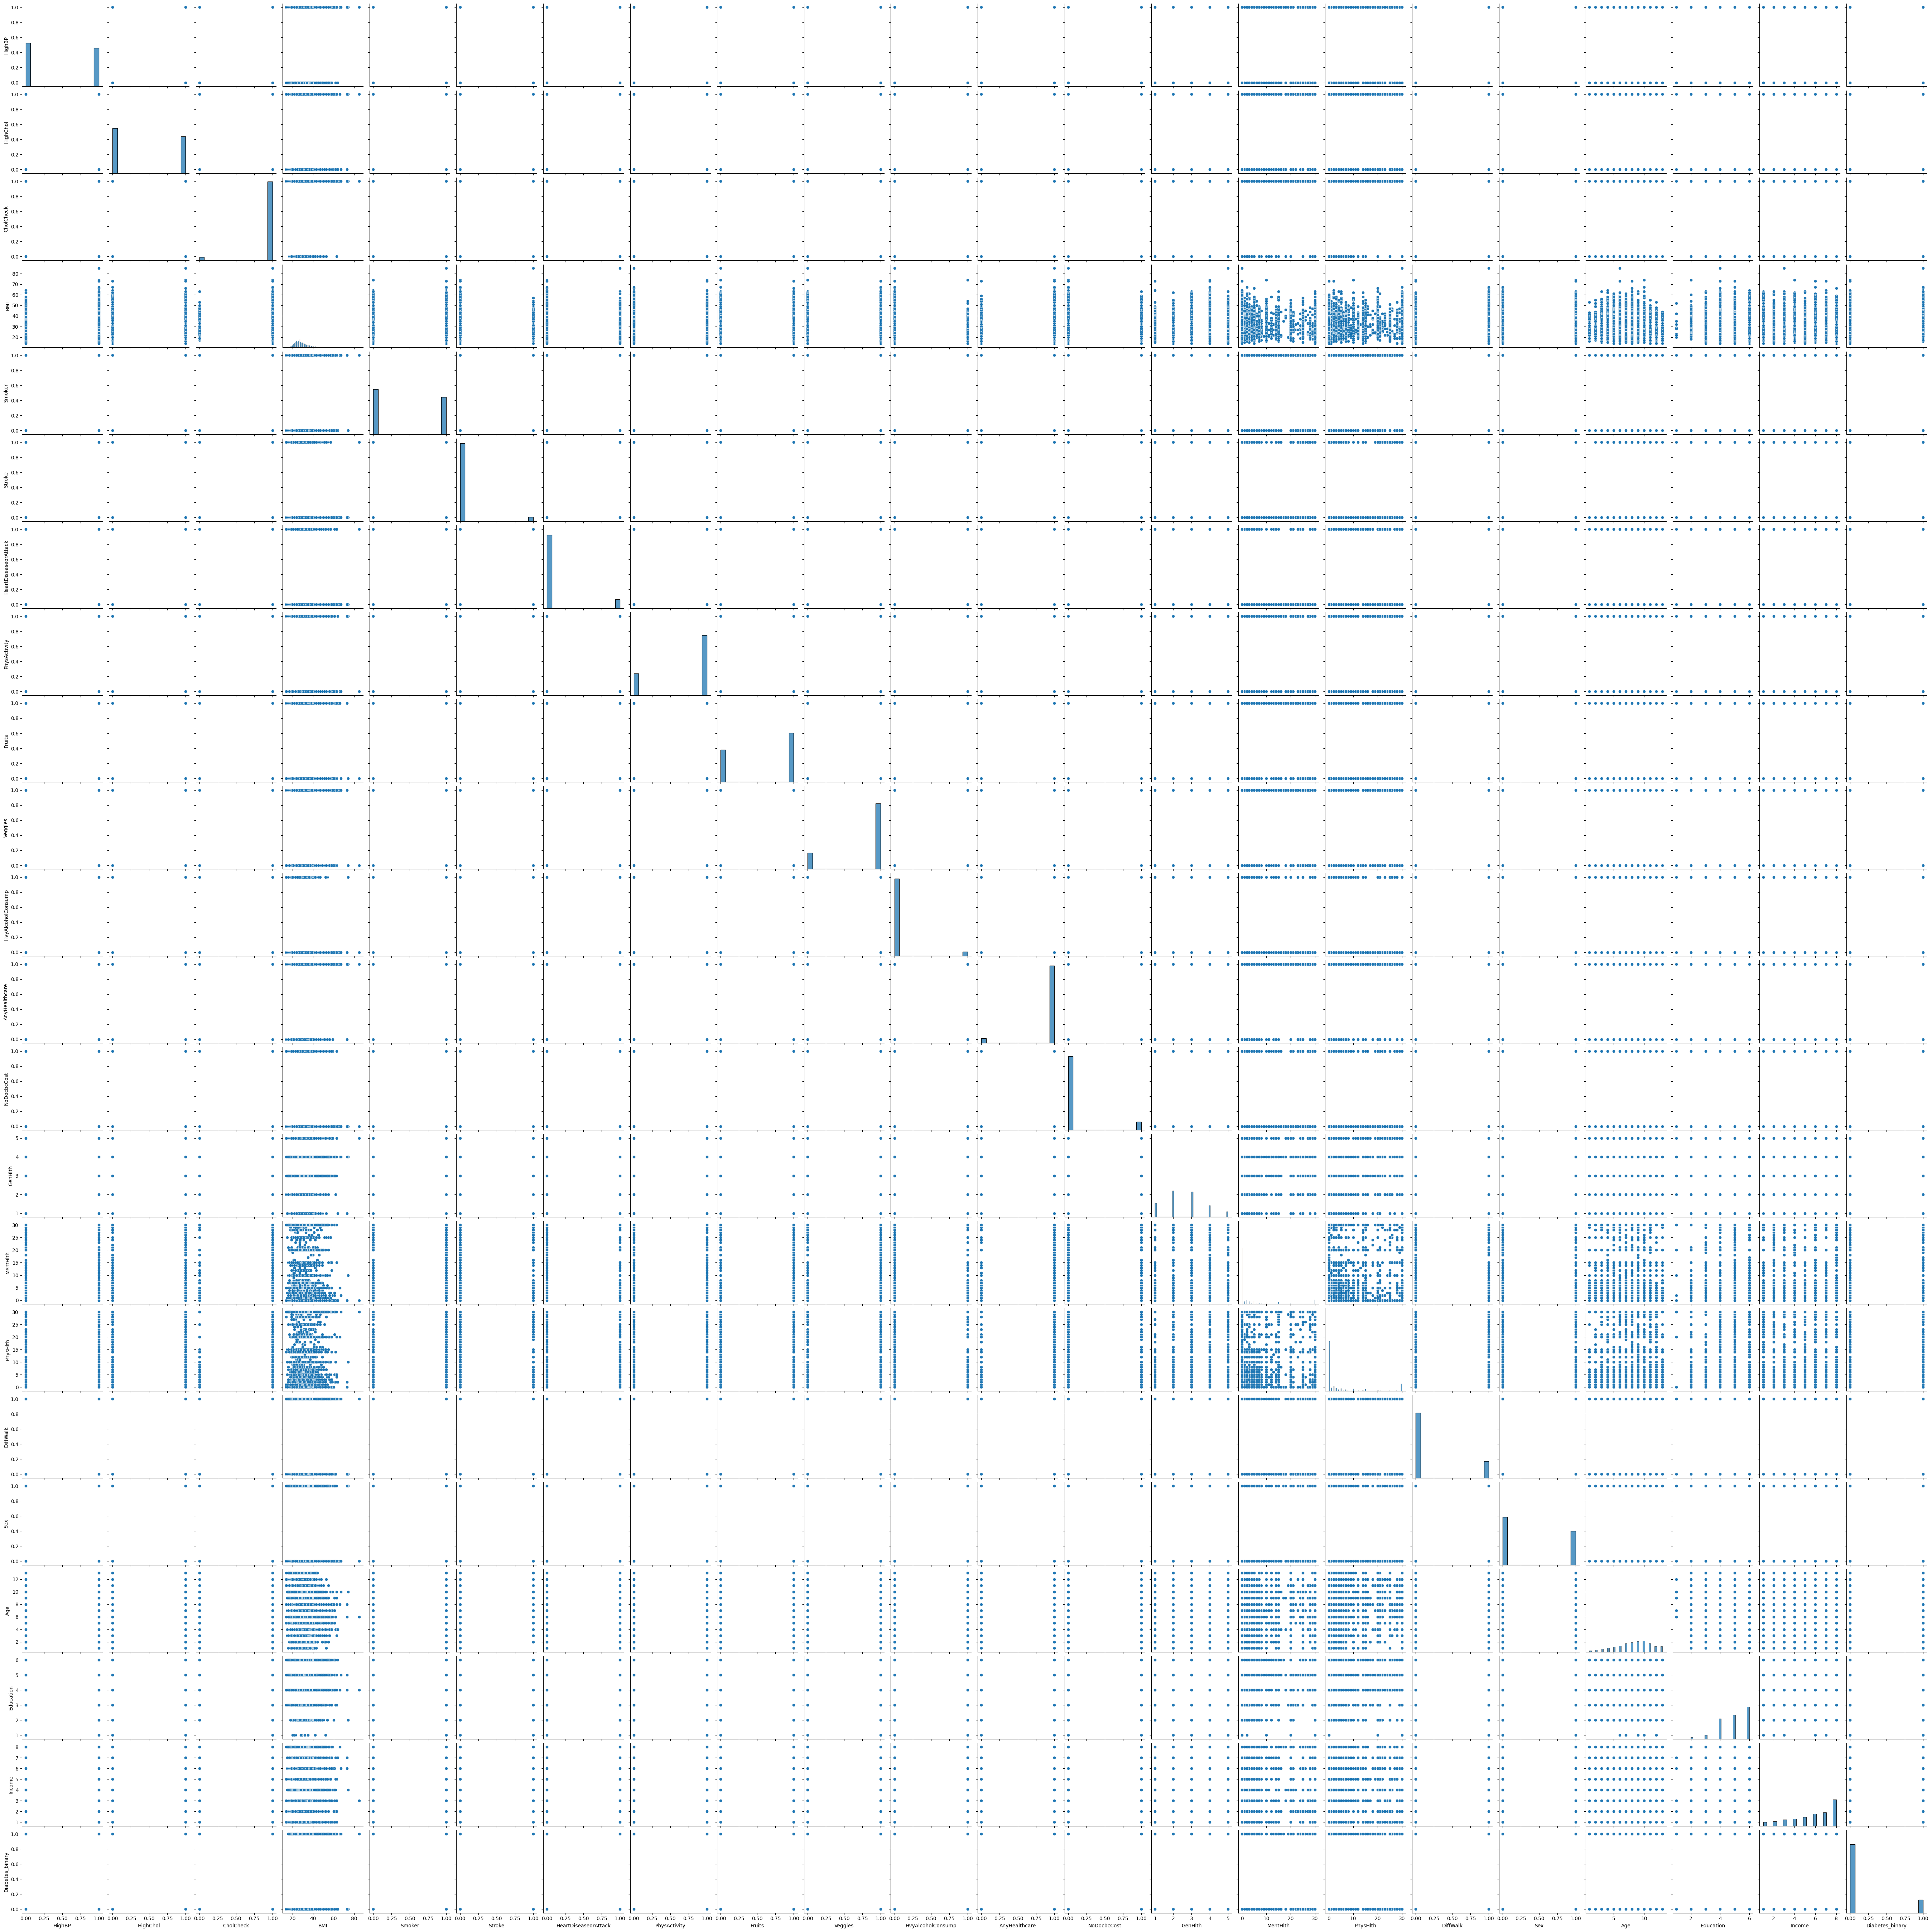

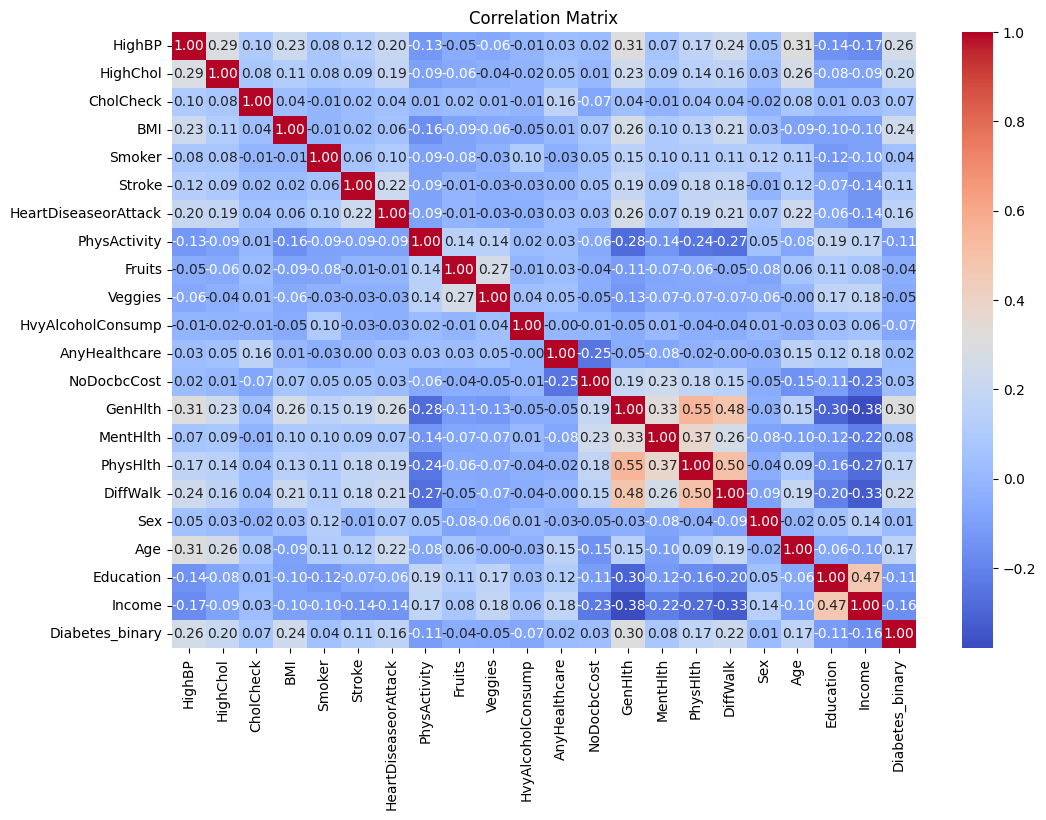

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Diabetes_dataset_15000.csv')

# Plot histograms for each numerical column
df.hist(bins=10, figsize=(15, 10))
plt.show()

# Pair plot to see relationships between features
sns.pairplot(df)
plt.show()

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

5. **Data Preprocessing - Data Cleaning:**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Diabetes_dataset_15000.csv')

# Check for missing values
print(df.isnull().sum())

# Impute missing values with the mean for numerical columns
df.fillna(df.mean(), inplace=True)

# For categorical columns, you can use mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

from scipy import stats

# Remove outliers using Z-score
z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]


import numpy as np

# Check skewness
skewness = df.skew(numeric_only=True)
print(skewness)

# Apply log transformation to reduce skewness
df['BMI'] = np.log1p(df['BMI'])
df['GenHlth'] = np.log1p(df['GenHlth'])
df['MentHlth'] = np.log1p(df['MentHlth'])
df['PhysHlth'] = np.log1p(df['PhysHlth'])

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64
HighBP                  0.157084
HighChol                0.219728
CholCheck               0.000000
BMI                     0.734753
Smoker                  0.330578
Stroke                  0.000000
HeartDiseaseorAttack    2.777596
PhysActivity           -1.203052
Fruits                 -0.470570
Veggies                -1.591499
HvyAlcoholConsump       0.000000
AnyHealthcare           0.000000
NoDocbcCost        

6. **Exploratory Data Analysis (EDA):**

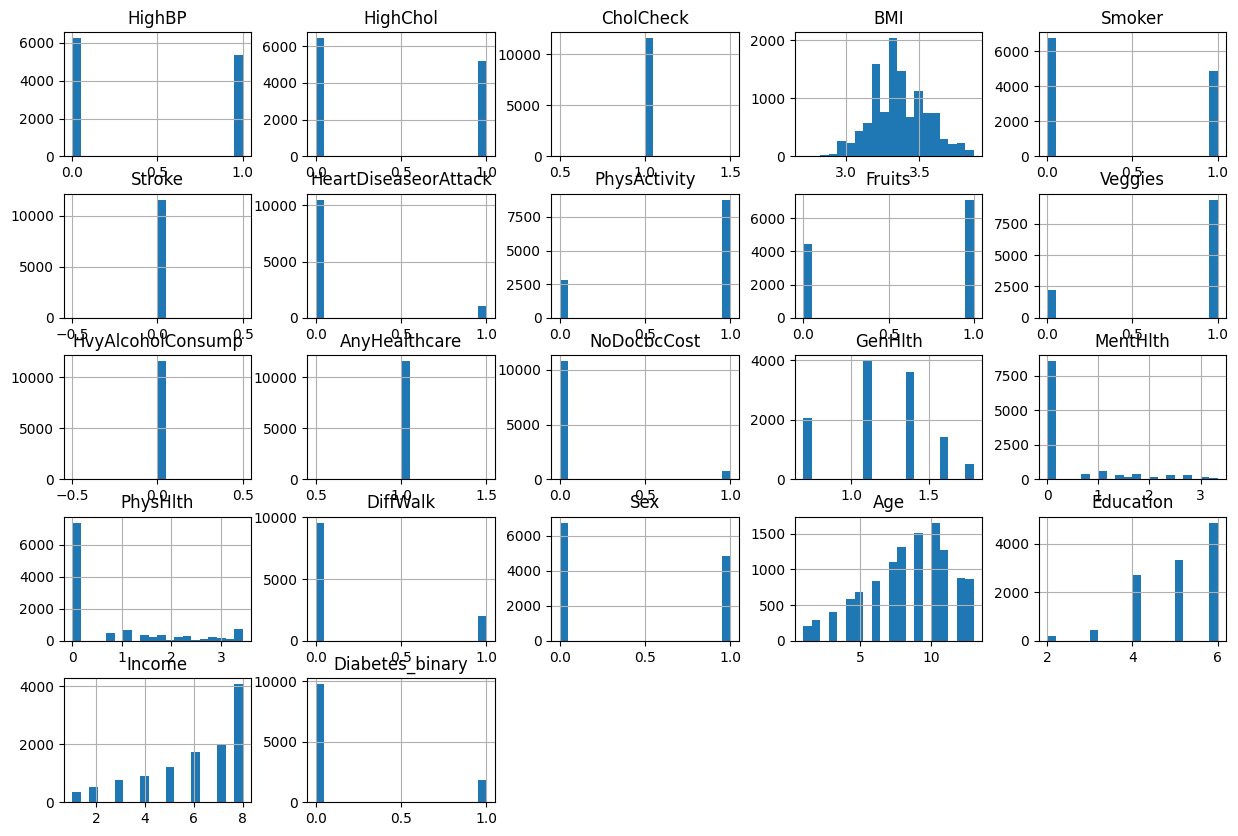

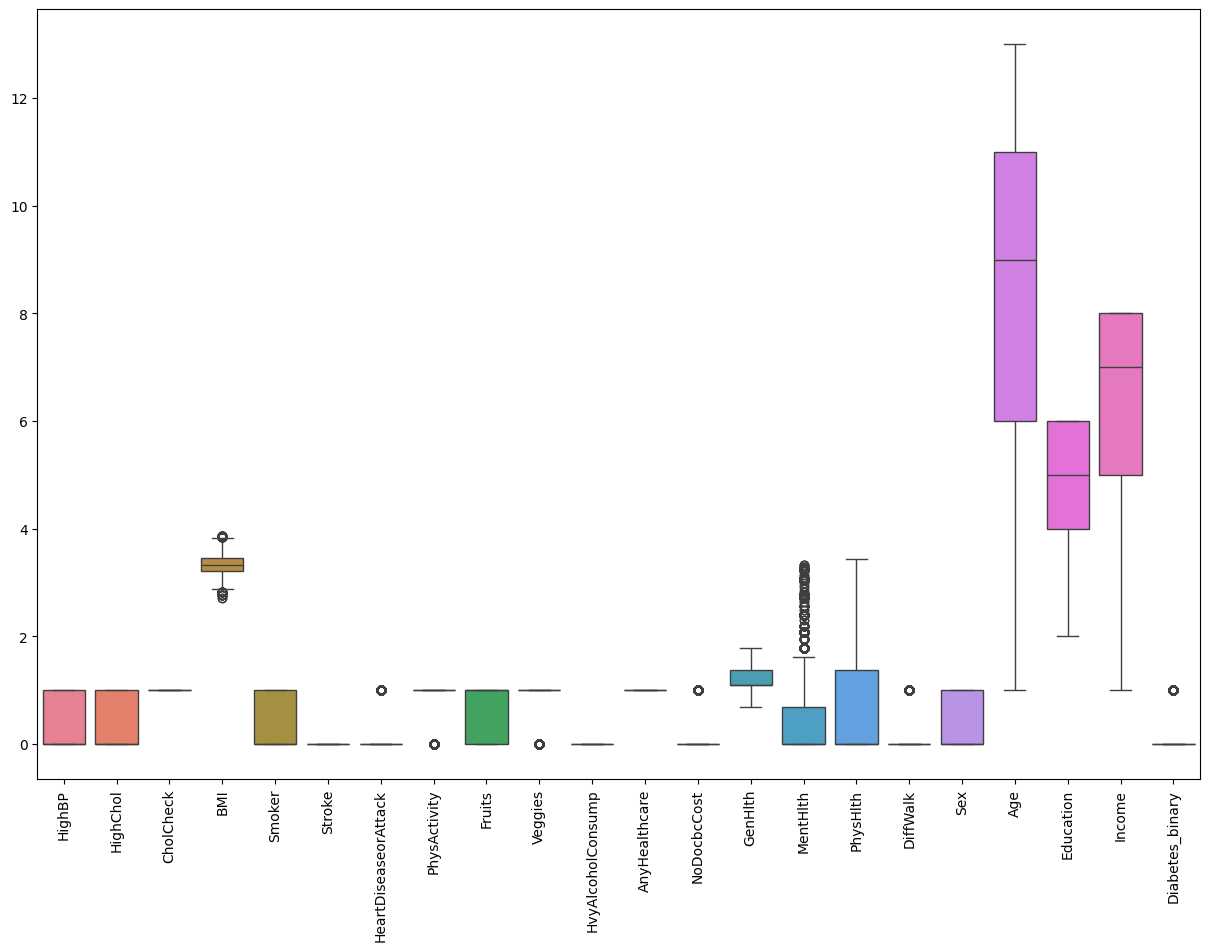

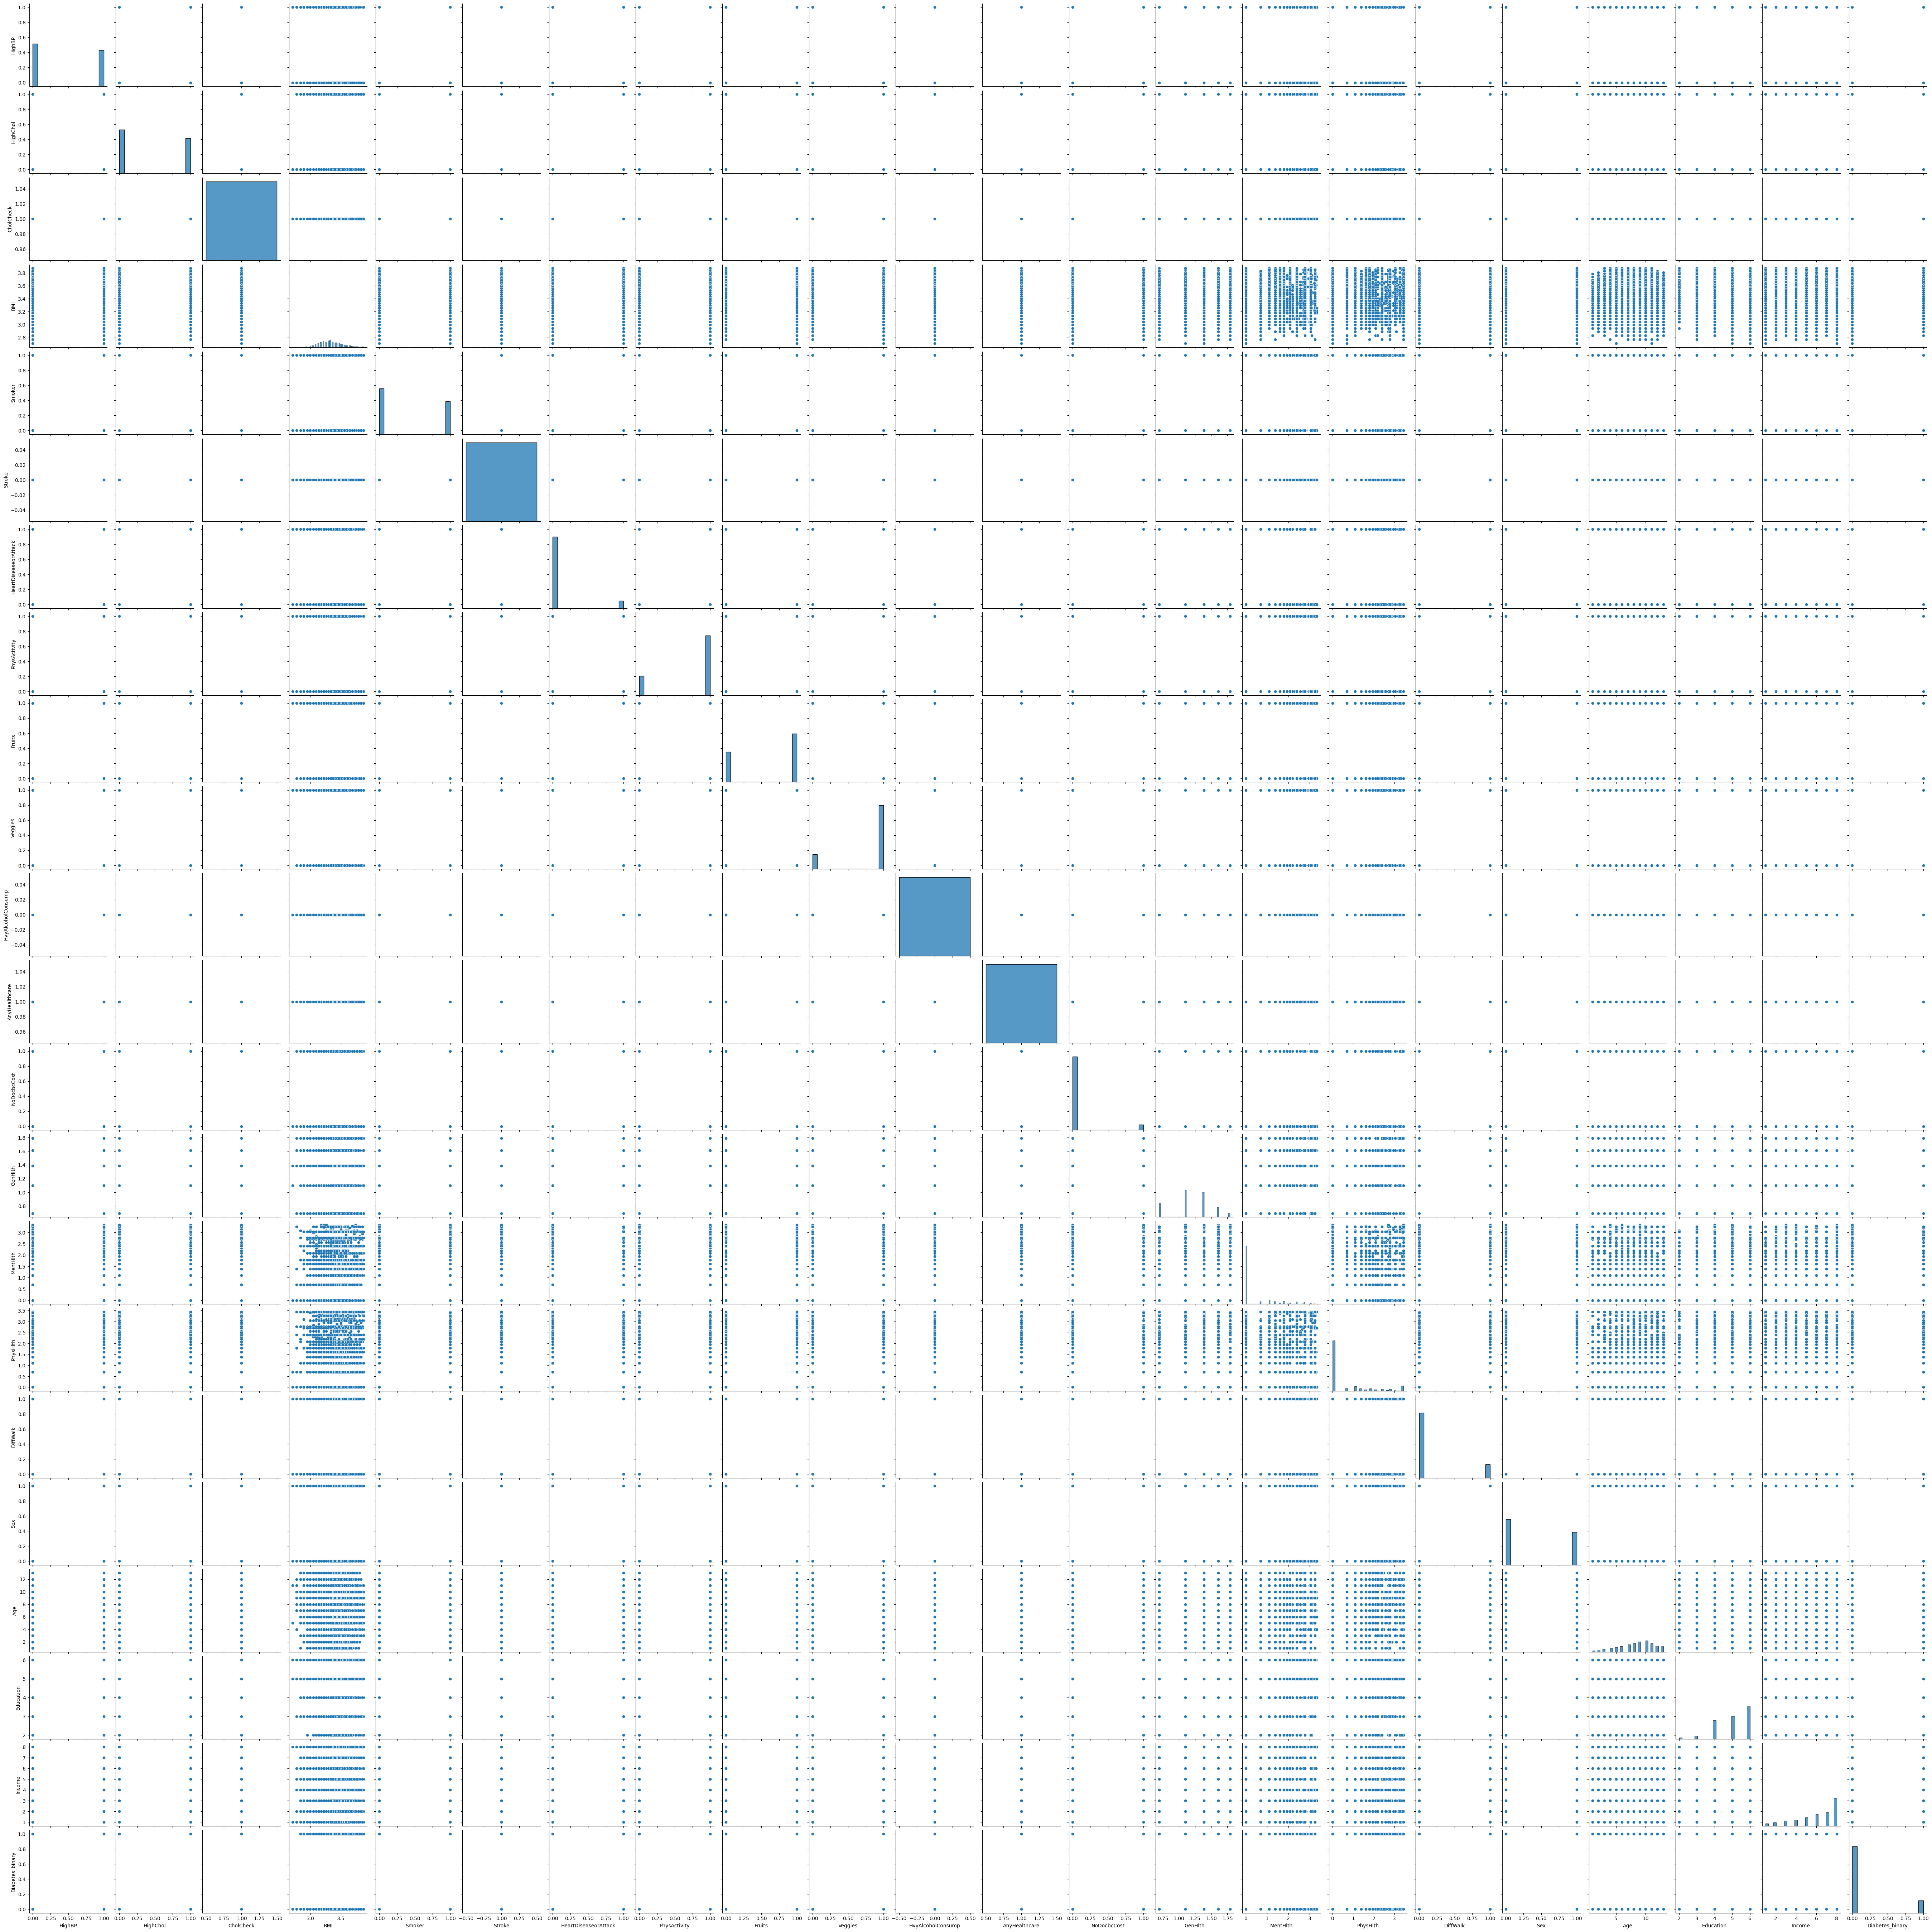

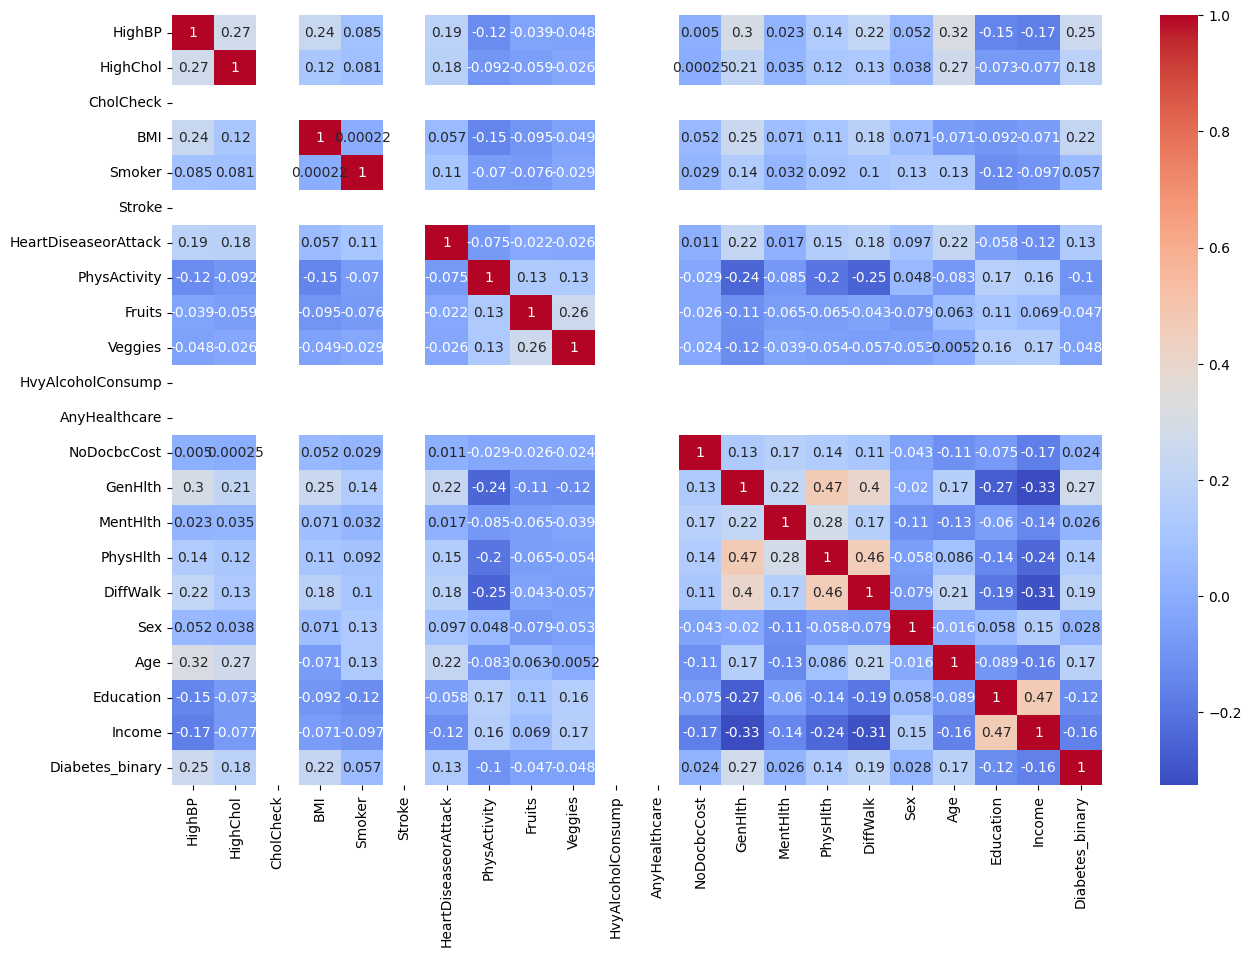

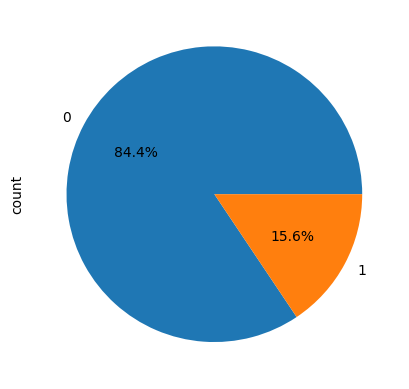

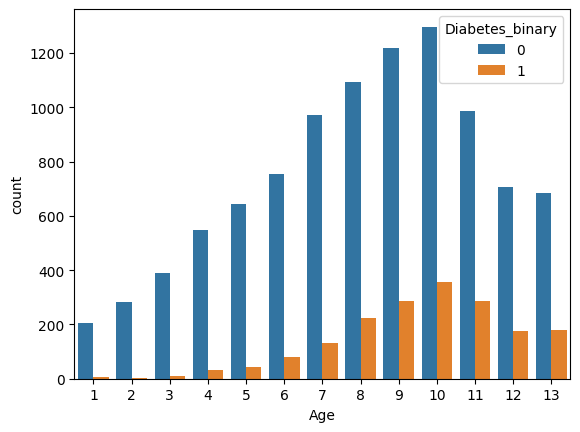

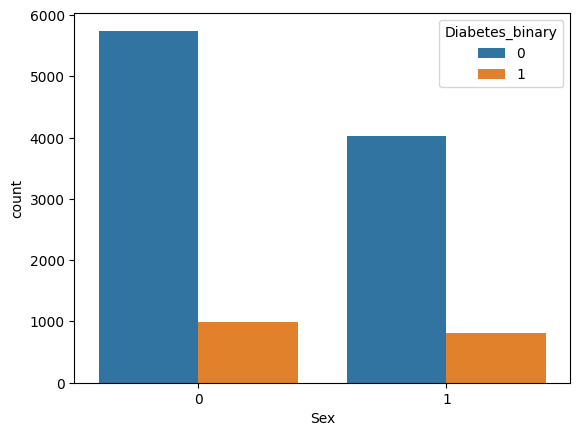

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Pair Plot
sns.pairplot(df)
plt.show()

# Heatmap Correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pie Diagram
df['Diabetes_binary'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

# Bar Plot
sns.countplot(x='Age', hue='Diabetes_binary', data=df)
plt.show()

# Count Plot
sns.countplot(x='Sex', hue='Diabetes_binary', data=df)
plt.show()


7. **Feature Engineering:**

In [ ]:
# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

8. **Feature Selection:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Random Forest for feature importance
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Select K Best
skb = SelectKBest(score_func=chi2, k=10)
skb.fit(X, y)
selected_features = X.columns[(skb.get_support())]
print(selected_features)

Feature ranking:
1. feature BMI (0.18361198178419602)
2. feature Age (0.12912155720394813)
3. feature Income (0.10305953485425397)
4. feature GenHlth (0.0815300535580898)
5. feature PhysHlth (0.08148242880570729)
6. feature Education (0.0730460789487955)
7. feature MentHlth (0.05856023815863488)
8. feature HighBP (0.04132374344192896)
9. feature Smoker (0.03422320933516751)
10. feature Sex (0.03385836224276393)
11. feature HighChol (0.03355708129483371)
12. feature Fruits (0.03241936191090412)
13. feature Veggies (0.027184207469009892)
14. feature PhysActivity (0.026653213627112784)
15. feature DiffWalk (0.02413903046418718)
16. feature HeartDiseaseorAttack (0.02235692314692336)
17. feature NoDocbcCost (0.013872993753542949)
18. feature AnyHealthcare (0.0)
19. feature Stroke (0.0)
20. feature CholCheck (0.0)
21. feature HvyAlcoholConsump (0.0)
Index(['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
  

9. **Split Data into Training and Testing Sets:**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

10. **Feature Scaling:**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

11. **Build the ML Model:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Classifier': MLPClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
SVM trained.
Decision Tree trained.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier trained.
Naive Bayes trained.
Random Forest trained.
K-Nearest Neighbors trained.
Gradient Boost trained.
AdaBoost trained.


12. **Model Evaluation:**


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print("\n")

Model: Logistic Regression
Confusion Matrix:
[[1930   31]
 [ 321   35]]
Accuracy: 0.8480794130340958
Precision: 0.5303030303030303
Recall: 0.09831460674157304
F1 Score: 0.16587677725118483
ROC AUC Score: 0.5412531728251465


Model: SVM
Confusion Matrix:
[[1952    9]
 [ 346   10]]
Accuracy: 0.8467846353042727
Precision: 0.5263157894736842
Recall: 0.028089887640449437
F1 Score: 0.05333333333333334
ROC AUC Score: 0.5117501962424583


Model: Decision Tree
Confusion Matrix:
[[1728  233]
 [ 268   88]]
Accuracy: 0.7837721191195511
Precision: 0.27414330218068533
Recall: 0.24719101123595505
F1 Score: 0.25997045790251105
ROC AUC Score: 0.564187040549135


Model: MLP Classifier
Confusion Matrix:
[[1914   47]
 [ 310   46]]
Accuracy: 0.8459214501510574
Precision: 0.4946236559139785
Recall: 0.12921348314606743
F1 Score: 0.20489977728285078
ROC AUC Score: 0.5526230597780312


Model: Naive Bayes
Confusion Matrix:
[[1628  333]
 [ 193  163]]
Accuracy: 0.7729823047043591
Precision: 0.3286290322580645
Rec

13. **Hyperparameter Tuning:**


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8407426149020972


14. **Save the Model:**

In [ ]:
import joblib

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

15. **Test with Unseen Data:**


In [ ]:
# Load the model
loaded_model = joblib.load('diabetes_model.pkl')

# Predict on unseen data
unseen_data = [[1.0, 0.0, 0.0, 1.0, 1.3862943611198906, 0.0, 0.0, 11.0, 6.0, 6.0]]
unseen_data_scaled = scaler.transform(unseen_data)
predictions = loaded_model.predict(unseen_data_scaled)
print(f"Predicted class: {predictions[0]}")

Predicted class: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


16. **Interpretation of Results (Conclusion):**

17. **Future Work:**
